## Overview

EnergiSmart menghadirkan tantangan nyata dalam upaya membangun kota cerdas (Smart City) yang berkelanjutan. Dataset ini merekam kondisi iklim kota L setiap jam—meliputi temperatur udara, tekanan atmosfer, kecepatan angin, serta dua variabel cuaca tambahan dan mengaitkannya dengan konsumsi listrik pada waktu yang sama. Setiap baris data merepresentasikan satu jam pengamatan.

Mengapa penting?
- Optimasi jaringan listrik – Dengan memahami pola hubungan cuaca dan konsumsi, operator dapat menyiapkan cadangan energi, mengurangi pemadaman, dan mengintegrasikan sumber terbarukan.
- Perencanaan kota adaptif – Informasi tekanan, suhu ekstrem, dan kecepatan angin membantu pemerintah merancang kebijakan efisiensi energi, sistem pendinginan perkotaan, hingga skema tarif dinamis.
- Kesadaran lingkungan – Prediksi yang akurat membuka peluang kampanye penghematan energi berbasis data, mendorong warga menurunkan jejak karbon.

Tujuan: Pemahaman dan penyelesaian hasil prediksi secara lengkap dari awal sampai akhir

### 1. Data Understanding
#### Columns
- ID: Kolom penanda unik untuk setiap observasi dalam dataset (berupa angka urut).
- tanggal_waktu: Kolom yang berisi tanggal dan waktu dalam format YYYY-MM-DD HH:MM:SS.
- suhu: Suhu udara saat pencatatan (dalam satuan derajat Celcius).
- beban_listrik: Nilai beban listrik pada waktu tertentu (dalam satuan MW), yang mewakili beban sistem distribusi pada generator pembangkit.
- kecepatan_angin: Kecepatan angin pada saat observasi (meter/menit).
- tekanan_udara: Tekanan atmosfer (dalam satuan hPa).
- dampak_lingkungan: Kategori kondisi lingkungan terhadap konsumsi energi:
    - A: Rendah – kondisi lingkungan dalam kondisi stabil.
    - B: Moderat – kondisi lingkungan mengalami perubahan.
    - C: Tinggi – kondisi lingkungan berisiko tinggi (cuaca buruk).
- konsumsi_listrik: Jumlah energi listrik yang digunakan setiap jam (dalam satuan MW), yang berfungsi sebagai variabel target. Namun, terkadang hasil pengukuran dapat mengalami gangguan atau kesalahan akibat faktor teknis

#### Files
- train.csv - Dataset yang digunakan untuk melatih model machine learning
- test.csv - Dataset yang digunakan untuk memprediksi dari hasil pelatihan
- sample_submission.csv - Format pengumpulan hasil prediksi


In [2]:
# Import library
import pandas as pd

In [53]:
# Buat data_train dan data_test dalam bentuk dataframe
df_train = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')

In [49]:
# Tampilkan Data Train dan Data Test
print("Data Train - Head")
display(df_train.head())

print("Data Train - Tail")
display(df_train.tail())

# Tampilkan Data Test
print("Data Test - Head")
display(df_test.head())

print("Data Test - Tail")
display(df_test.tail())


Data Train - Head


,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan,konsumsi_listrik
0,0,2021-09-17 00:00:00,15.9,-17.1,571.910,1003.0,A,216.0
1,1,2021-09-17 01:00:00,15.5,-19.3,575.040,996.0,A,210.0
2,2,2021-09-17 02:00:00,15.1,-20.0,578.435,1000.0,A,225.0
3,3,2021-09-17 03:00:00,15.9,-17.1,582.580,995.0,A,216.0
4,4,2021-09-17 04:00:00,15.9,-19.3,586.600,1005.0,A,222.0


Data Train - Tail


,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan,konsumsi_listrik
24331,32179,2025-05-19 19:00:00,27.8,10.7,4.505,981.0,A,186.0
24332,32180,2025-05-19 20:00:00,27.8,7.9,4.005,976.0,A,198.0
24333,32181,2025-05-19 21:00:00,27.8,10.0,5.920,989.0,A,192.0
24334,32182,2025-05-19 22:00:00,27.0,9.3,3.040,982.0,A,183.0
24335,32183,2025-05-19 23:00:00,27.4,10.0,4.205,979.0,A,192.0


Data Test - Head


,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan
0,32184,2025-05-20 00:00:00,27.8,7.1,2.075,980.0,A
1,32185,2025-05-20 01:00:00,26.2,7.1,5.005,988.0,A
2,32186,2025-05-20 02:00:00,27.4,6.4,7.385,990.0,A
3,32187,2025-05-20 03:00:00,26.6,9.3,1.890,973.0,A
4,32188,2025-05-20 04:00:00,26.2,9.3,2.540,989.0,A


Data Test - Tail


,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan
2155,34891,2025-09-09 19:00:00,21.8,-15.0,51.685,1009.0,A
2156,34892,2025-09-09 20:00:00,20.6,-11.4,56.105,1005.0,A
2157,34893,2025-09-09 21:00:00,21.4,-12.9,61.275,995.0,A
2158,34894,2025-09-09 22:00:00,20.6,-11.4,67.210,996.0,A
2159,34895,2025-09-09 23:00:00,21.1,-11.4,71.880,1009.0,A


In [11]:
#Deskripsikan tipe data dari tiap-tiap kolom
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24336 entries, 0 to 24335
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 24336 non-null  int64  
 1   tanggal_waktu      24336 non-null  object 
 2   suhu               24336 non-null  float64
 3   beban_listrik      24336 non-null  float64
 4   kecepatan_angin    24336 non-null  float64
 5   tekanan_udara      24336 non-null  float64
 6   dampak_lingkungan  24336 non-null  object 
 7   konsumsi_listrik   24283 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.5+ MB


In [50]:
#Wawasan perhitungan matematis
display(df_train.describe())
#Bentuk Data (Baris, Kolom)
display(df_train.shape)

,ID,suhu,beban_listrik,kecepatan_angin,tekanan_udara,konsumsi_listrik
count,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24283.000000
mean,16027.381657,25.161082,-1.783510,23.631823,986.012964,532.445209
std,9299.957517,4.888658,10.521302,46.781818,12.130831,4826.021227
min,0.000000,12.700000,-32.900000,1.075000,953.000000,174.000000
25%,8051.750000,21.100000,-10.700000,3.165000,977.000000,219.000000
50%,16079.500000,25.800000,-1.400000,6.670000,986.000000,270.000000
75%,24155.250000,29.400000,7.900000,22.700000,995.000000,342.000000
max,32183.000000,35.300000,18.600000,586.600000,1024.000000,99999.000000


(24336, 8)

### 2. Data Preprocessing
- Konversi Kolom Waktu
- Handling Missing Values
- Data Cleaning
- Encoding Data
- Feature Scaling
- Feature Engineering


In [68]:
# 1. Konversi Kolom Waktu
# Ubah kolom tanggal_waktu pada df_train dan df_test dalam format datetime
df_train['tanggal_waktu'] = pd.to_datetime(df_train['tanggal_waktu'])
df_test['tanggal_waktu'] = pd.to_datetime(df_train['tanggal_waktu'])

# Lihat tipe data kolom tanggal_waktu
tipe_waktu = pd.DataFrame({
    'DataFrame': ['df_train', 'df_test'],
    'Tipe Data': [df_train['tanggal_waktu'].dtype, df_test['tanggal_waktu'].dtype]
})
display(tipe_waktu)


,DataFrame,Tipe Data
0,df_train,datetime64[ns]
1,df_test,datetime64[ns]


In [70]:
# 2. Feature Engineering
# Buat kolom baru: tahun, bulan, tanggal, waktu, dan tetap pertahankan tanggal_waktu
df_train['tahun'] = df_train['tanggal_waktu'].dt.year
df_train['bulan'] = df_train['tanggal_waktu'].dt.month
df_train['tanggal'] = df_train['tanggal_waktu'].dt.day
df_train['waktu'] = df_train['tanggal_waktu'].dt.time

df_test['tahun'] = df_test['tanggal_waktu'].dt.year
df_test['bulan'] = df_test['tanggal_waktu'].dt.month
df_test['tanggal'] = df_test['tanggal_waktu'].dt.day
df_test['waktu'] = df_test['tanggal_waktu'].dt.time

#  Lihat hasil
display(df_train[['tanggal_waktu', 'tanggal', 'bulan', 'tahun', 'waktu']].head())
display(df_test[['tanggal_waktu', 'tanggal', 'bulan', 'tahun', 'waktu']].head())

,tanggal_waktu,tanggal,bulan,tahun,waktu
0,2021-09-17 00:00:00,17,9,2021,00:00:00
1,2021-09-17 01:00:00,17,9,2021,01:00:00
2,2021-09-17 02:00:00,17,9,2021,02:00:00
3,2021-09-17 03:00:00,17,9,2021,03:00:00
4,2021-09-17 04:00:00,17,9,2021,04:00:00


,tanggal_waktu,tanggal,bulan,tahun,waktu
0,2021-09-17 00:00:00,17,9,2021,00:00:00
1,2021-09-17 01:00:00,17,9,2021,01:00:00
2,2021-09-17 02:00:00,17,9,2021,02:00:00
3,2021-09-17 03:00:00,17,9,2021,03:00:00
4,2021-09-17 04:00:00,17,9,2021,04:00:00


In [58]:
print("Jumlah dan Persentase Missing Value di Setiap Kolom:")

missing_df = df_train.isnull().sum().to_frame(name='Jumlah Missing')
missing_df['Persentase (%)'] = (missing_df['Jumlah Missing'] / len(df_train)) * 100


display(missing_df.round(2))

Jumlah dan Persentase Missing Value di Setiap Kolom:


,Jumlah Missing,Persentase (%)
ID,0,0.00
tanggal_waktu,0,0.00
suhu,0,0.00
beban_listrik,0,0.00
kecepatan_angin,0,0.00
tekanan_udara,0,0.00
dampak_lingkungan,0,0.00
konsumsi_listrik,53,0.22


In [16]:
#Karena hanya 53 dari 24336 baris yang bernilai null, maka baris yang bernilai null akan di-drop karena tidak terlalu berpengaruh (hanya 0,2% saja).
df_train = df_train.dropna()
display(df_train.isnull().sum())
display(df_train.shape)

ID                   0
tanggal_waktu        0
suhu                 0
beban_listrik        0
kecepatan_angin      0
tekanan_udara        0
dampak_lingkungan    0
konsumsi_listrik     0
dtype: int64

(24283, 8)

In [17]:
# 2. Cek data kategorikal dampak_lingkungan
# Mengecek nilai unik dan jumlahnya dari kolom 'dampak_lingkungan'
jumlah_unik = df_train['dampak_lingkungan'].value_counts().reset_index()
jumlah_unik.columns = ['Nilai Unik', 'Jumlah']
display(jumlah_unik)


,Nilai Unik,Jumlah
0,A,23091
1,C,976
2,B,216


In [31]:
# 3. Deteksi Outlier
# Buat Fungsi untuk menghitung IQR dan outlier
def detect_outliers_iqr(df):
    outlier_summary = {}
    total_rows = len(df)

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / total_rows) * 100

        outlier_summary[col] = {
            'Jumlah Outlier': outlier_count,
            'Persentase Outlier (%)': round(outlier_percentage, 2)
        }

    return pd.DataFrame.from_dict(outlier_summary, orient='index')

In [32]:
# Tampilkan tabel outlier per kolom
display(detect_outliers_iqr(df_train))

,Jumlah Outlier,Persentase Outlier (%)
ID,0,0.00
suhu,0,0.00
beban_listrik,0,0.00
kecepatan_angin,2669,10.99
tekanan_udara,3,0.01
konsumsi_listrik,1123,4.62


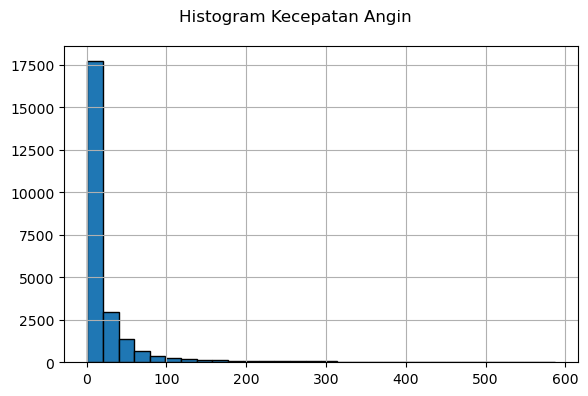

In [34]:
df_train.kecepatan_angin.hist(figsize=(6, 4), bins=30, edgecolor='black')
plt.suptitle("Histogram Kecepatan Angin")
plt.tight_layout()
plt.show()


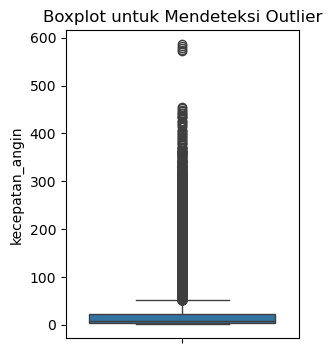

In [52]:
# Boxplot untuk kecepatan angin
plt.figure(figsize=(3, 4))
sns.boxplot(data=df_train.kecepatan_angin)
plt.xticks(rotation=45)
plt.title('Boxplot untuk Mendeteksi Outlier')
plt.show()

In [45]:
df_train.kecepatan_angin.quantile(0)

np.float64(1.075)

In [51]:
angin_km_per_h = df_train.kecepatan_angin * 60 /1000
angin_km_per_h.describe()

count    24336.000000
mean         1.417909
std          2.806909
min          0.064500
25%          0.189900
50%          0.400200
75%          1.362000
max         35.196000
Name: kecepatan_angin, dtype: float64